# **Music Recommendation System (Group-26)**

**Problem Statement:** To build a music recommendation system that not only considers the popularity of ths songs, user input or interactions but also the song features in order to recommend best songs that perfectly depicts user's taste and interest.

**Approach:**

**Model 1: User-User Collaborative Filtering:**
Recommends items to a user based on preferences or behavior of similar users.
It identifies patterns in user-item interactions (e.g., count) to make recommendations.

**Model 2: Matrix Factorization**
Recommendation system predicts based on user interaction with the item.

**Model 3: Content-Based Music Recommendation System**
Recommendation system will consider music itself which includes textual data like artist information, song title, song name, album which can offer more accurate personalized recommendations to users.


**Implementation:**
Develop a collaborative system and content-based system that recommends similar songs based on artist and user similarity.
Utilize techniques such as TF-IDF or Word2Vec for feature extraction.
Implement matrix factorization techniques like Singular Value Decomposition (SVD) to factorize the user-song interaction matrix and cosine similarity.
Refining the recommendation system based on performance analysis using hyper parameter tuning.
Evaluate the performance of the system using evaluation metrics such as accuracy, RMSE.



# Importing the required libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

Million Song Dataset which is Taste Profile Subset http://millionsongdataset.com/tasteprofile/


In [57]:
# Importing the datasets
column_names = ['user_id', 'song_id', 'count']
# Loading the Count dataset
df_count = pd.read_csv('/content/kaggle_visible_evaluation_triplets.txt', delimiter='\t', names=column_names)
# Loading the Song dataset
df_song = pd.read_csv('/content/song_dataset.csv')

In [58]:
#User count data
df_count.head(10)

,user_id,song_id,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2


In [59]:
#Song data
df_song.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [60]:
#Summary of the Count data
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   count    1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [61]:
#Summary of the Song data
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [62]:
# Merging the two DataFrames based on 'song_id'
merged_df = pd.merge(df_count, df_song.drop_duplicates(subset='song_id'), how='left', on='song_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450933 non-null  object
 1   song_id      1450933 non-null  object
 2   count        1450933 non-null  int64 
 3   title        1450932 non-null  object
 4   release      1450931 non-null  object
 5   artist_name  1450933 non-null  object
 6   year         1450933 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 77.5+ MB


Label Encoding the user id and song id

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()
# Label encoder applied to the required columns
merged_df['user_id'] = label_encoder.fit_transform(merged_df['user_id'])
merged_df['song_id'] = label_encoder.fit_transform(merged_df['song_id'])
# Displaying the first few rows of the DataFrame
merged_df.head()

,user_id,song_id,count,title,release,artist_name,year
0,108811,10546,1,You're The One,If There Was A Way,Dwight Yoakam,1990
1,108811,28684,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
2,108811,36622,1,Tive Sim,Nova Bis-Cartola,Cartola,1974
3,108811,51861,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0
4,108811,24663,1,El Cuatrero,From Argentina To The World,Miguel Calo,2001


# Feature Engineering

Reducing the huge dataset for model training

Userid mapped to frequency of songs heard by user

In [64]:
# Fetching the column having the users
user_ids = merged_df.user_id

# Creating a dictionary from user_ids to their number of songs listened
user_song_count = {}

# Iterating over user_id and counting their songs
for user_id in user_ids:
    # In case user_id is already existing in the dictionary then increment the count
    if user_id in user_song_count:
        user_song_count[user_id] += 1
    # else initialize the value to 1
    else:
        user_song_count[user_id] = 1

Eliminating users with fewer song count

In [92]:
#Removing the users who have listened to less than 30 songs
min_song_threshold = 30
remove_users = []
#Iterating over the user and count dictionary
for user, num_songs in user_song_count.items():
    if num_songs < min_song_threshold:
        remove_users.append(user)
merged_df = merged_df.loc[~merged_df.user_id.isin(remove_users)]

Unique song ID, and the corresponding value represents the number of users who have listened to that song.


In [91]:
#Fetch the song_id column
song_ids = merged_df.song_id
song_user_count = {}
for song_id in song_ids:
    if song_id in song_user_count:
        song_user_count[song_id] += 1
    else:
        song_user_count[song_id] = 1

In [11]:
#song_user_count.items()

In [93]:
#Removing the songs which are heard by lesser than 30 number of users
min_user_threshold =30
remove_songs = []
for song_id, num_users in song_user_count.items():
    if num_users < min_user_threshold:
        remove_songs.append(song_id)
df_subset= merged_df.loc[~merged_df.song_id.isin(remove_songs)]

In [94]:
df_subset

,user_id,song_id,count,title,release,artist_name,year
141,4835,27479,1,Hotel California,Hotel California / Pretty Maids All In A Row [...,Eagles,1976
144,4835,53857,2,Black,Ten,Pearl Jam,1991
148,4835,142276,1,Wait And Bleed (Album Version),Slipknot,Slipknot,1989
149,4835,50472,1,Elephant Gun,The Gulag Orkestar,Beirut,2006
154,4835,88796,4,Float On,Float On,Modest Mouse,2003
...,...,...,...,...,...,...,...
1450271,58148,122032,9,Teach Me How To Dougie,Teach Me How To Dougie,California Swag District,0
1450323,31997,67651,1,Smile Like You Mean It,Hot Fuss,The Killers,2003
1450343,31997,113756,1,Otherside (Album Version),Greatest Hits,Red Hot Chili Peppers,2003
1450398,101169,133072,1,Drop The World,Drop The World,Lil Wayne / Eminem,0


In [95]:
merged_df.head(10)

,user_id,song_id,count,title,release,artist_name,year
138,4835,95531,1,Whine feat. Beenie Man & Natalie Storm,Raggatronic,Enur,2008
139,4835,101335,2,Too Bad,Silver Side Up,Nickelback,2001
140,4835,128854,1,Bratislava,The Gulag Orkestar,Beirut,2005
141,4835,27479,1,Hotel California,Hotel California / Pretty Maids All In A Row [...,Eagles,1976
142,4835,27211,1,Kaman Song,Hangveto 2005 - 2006 Válogatás - Compilation,Mitsoura,2003
143,4835,59262,1,No Existes,Signos,Soda Stereo,1986
144,4835,53857,2,Black,Ten,Pearl Jam,1991
145,4835,6889,1,Gandhi,Anthologie Vol. 9: Hello Again/Howard Carpendale,Howard Carpendale,1984
146,4835,129210,1,Longview (Album Version),Dookie,Green Day,1994
147,4835,53837,1,Danza Rota,Nada Personal,Soda Stereo,1985


In [97]:
# Finding the count values less than 60
count_less_than_60 = merged_df[merged_df['count'] < 60]

# Finding the count values greater than 60
count_greater_than_60 = merged_df[merged_df['count'] > 60]

# Printing the count of each group
print("Count values less than 60:", count_less_than_60.shape[0])
print("Count values greater than 60:", count_greater_than_60.shape[0])

Count values less than 60: 205335
Count values greater than 60: 298


# Exploratory Data Analysis

In [98]:
#Number of unique users in the dataset
df_subset['user_id'].nunique()

5247

In [99]:
#Number of unique songs in the dataset
df_subset['song_id'].nunique()

486

In [100]:
#Number of unique artists in the dataset
df_subset['artist_name'].nunique()

296

In [101]:
#Song having the highest play count value
print(df_subset.groupby(['title']).sum().sort_values('count', ascending=False).index[0])
df_subset.groupby(['title']).sum().sort_values('count', ascending=False).song_id[0]

You're The One


3269260

In [102]:
#User with highest play count value
df_subset.groupby(['user_id']).sum().sort_values('count', ascending=False).index[0]

63304

In [103]:
# Summary Statistics of the subset data
print(df_subset.describe())

             user_id        song_id         count          year
count   30751.000000   30751.000000  30751.000000  30751.000000
mean    55027.862313   81180.745439      3.643361   1556.014699
std     31792.529387   47184.878853      6.880300    832.752644
min        24.000000     225.000000      1.000000      0.000000
25%     27352.000000   38185.000000      1.000000   1974.000000
50%     55041.000000   86633.000000      1.000000   2002.000000
75%     82830.000000  123784.000000      4.000000   2008.000000
max    109994.000000  162911.000000    213.000000   2010.000000


Data Visualization

 Histogram(Frequency of songs)

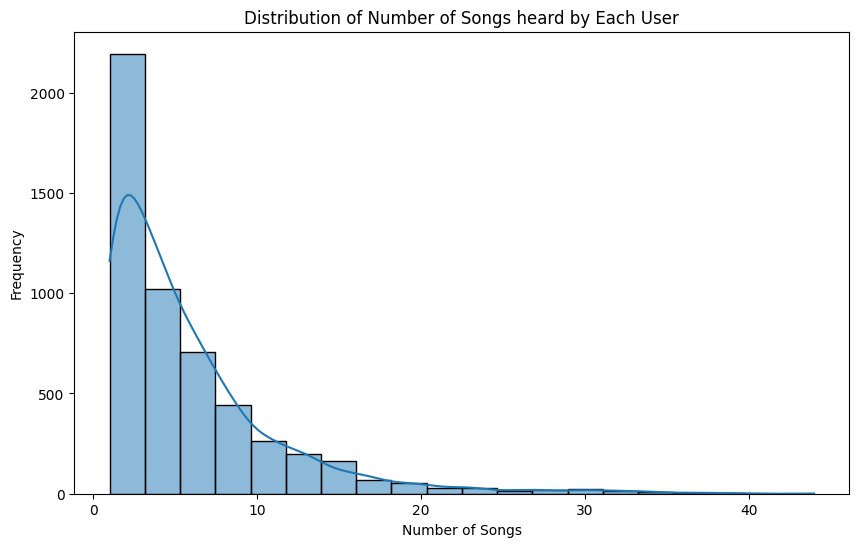

In [104]:
#Distribution of Number of Songs heard by Each User
#figure size
plt.figure(figsize=(10, 6))
#Plotting the histogram
sns.histplot(df_subset.groupby('user_id')['count'].count(), bins=20, kde=True)
plt.title('Distribution of Number of Songs heard by Each User')
#Labelling x-axis
plt.xlabel('Number of Songs')
#Labelling y-axis
plt.ylabel('Frequency')
plt.show()

Bar graph of Top 10 Artists

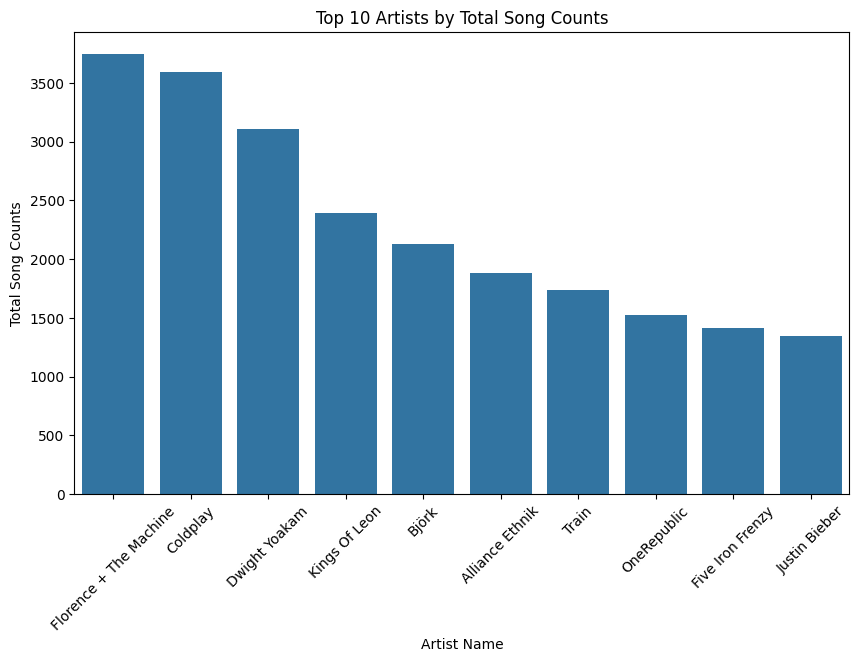

In [105]:
#Displaying the top artists using play count data
plt.figure(figsize=(10, 6))
#Plotting the bar graph
sns.barplot(x='artist_name', y='count', data=df_subset.groupby('artist_name').sum().reset_index().sort_values(by='count', ascending=False).head(10))
plt.title('Top 10 Artists by Total Song Counts')
plt.xlabel('Artist Name')
plt.ylabel('Total Song Counts')
plt.xticks(rotation=45)
plt.show()

Scatter Plot

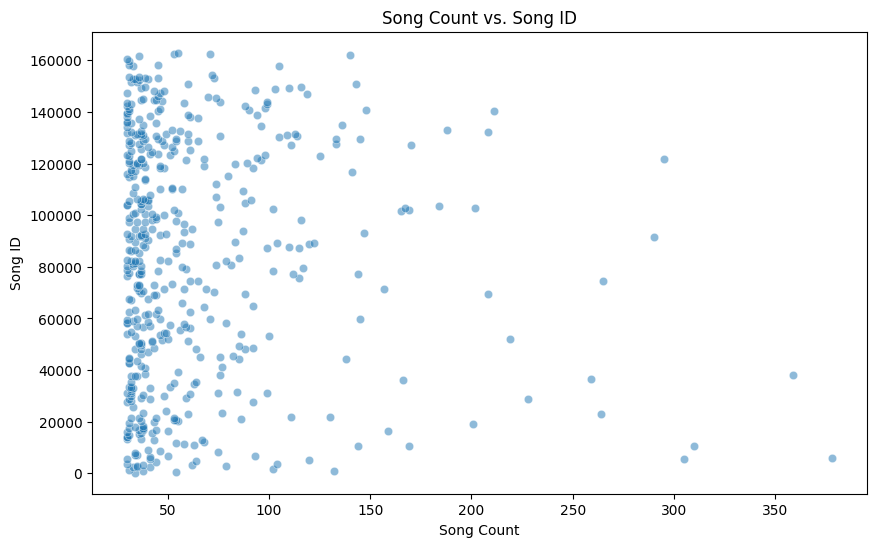

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='count', y='song_id', data=df_subset.groupby('song_id').count().reset_index(), alpha=0.5)
plt.title('Song Count vs. Song ID')
plt.xlabel('Song Count')
plt.ylabel('Song ID')
plt.show()

Linear plot(number of songs release per year)

In [106]:
#Number of songs release per year
songs_per_year = df_subset.groupby('year')['count'].count().to_frame()
songs_per_year = songs_per_year[songs_per_year.index != 0]
songs_per_year.tail()

,count
year,
2006,1258
2007,1774
2008,2968
2009,4082
2010,1270


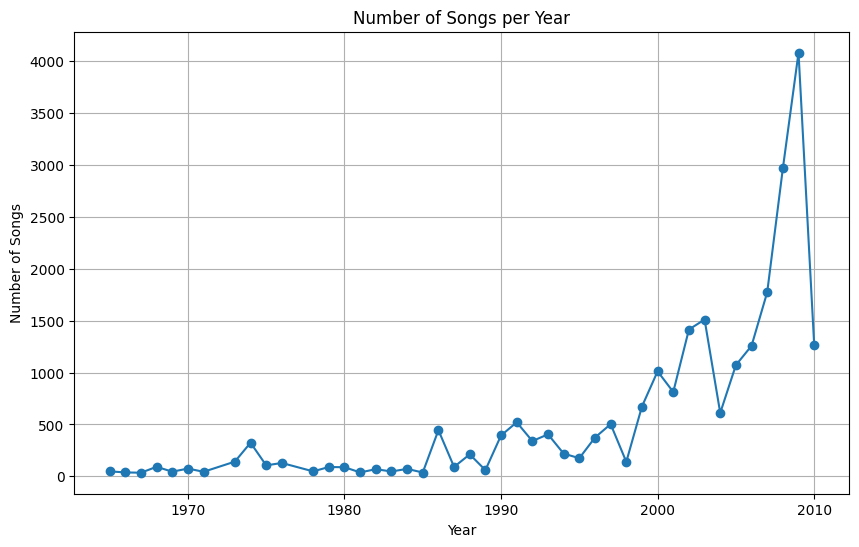

In [107]:
# Plotting the number of songs per year
plt.figure(figsize=(10, 6))
plt.plot(songs_per_year.index, songs_per_year['count'], marker='o', linestyle='-')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [108]:
# Finding the year with the highest number of songs listened
highest_songs_year = songs_per_year.idxmax()[0]
highest_songs_count = songs_per_year.loc[highest_songs_year]['count']
print("Year with the highest number of songs listened:", highest_songs_year, "| Number of songs listened in the highest year:", highest_songs_count)

Year with the highest number of songs listened: 2009 | Number of songs listened in the highest year: 4082


# Model-1: User-User Similarity-Based Collaborative Filtering

In [109]:
#!pip install surprise

Function to calculate the precision, recall and F1-score

In [110]:
from surprise.model_selection import KFold
from surprise import accuracy

# Defining the function to calculate the precision, recall, and F1-score
def calculate_precision_recall_f1(predictions, threshold=2):
    # Initializing the variables for precision, recall, and F1-score
    tp = 0  # True positives
    fp = 0  # False positives
    fn = 0  # False negatives

    # Iterating over the predictions
    for uid, _, true_r, est, _ in predictions:
        # If estimated rating is greater than or equal to threshold, and true rating is also greater than or equal to threshold
        if est >= threshold and true_r >= threshold:
            tp += 1
        # If estimated rating is greater than or equal to threshold, but true rating is less than threshold
        elif est >= threshold and true_r < threshold:
            fp += 1
        # If estimated rating is less than threshold, but true rating is greater than or equal to threshold
        elif est < threshold and true_r >= threshold:
            fn += 1

    # Calculating the precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Calculating the recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculating the F1-score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

In [111]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Loading the dataset from DataFrame
reader = Reader(rating_scale=(1, df_subset['count'].max()))
data = Dataset.load_from_df(df_subset[['user_id', 'song_id', 'count']], reader)

Training the KNN model

In [112]:
# Splitting the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Initializing the KNNBasic with the best parameters
sim_param = {'name': 'cosine', 'user_based': False}
KNN_model = KNNBasic(k=30, sim_options=sim_param)

# Train the model on the entire training set
KNN_model.fit(trainset)

# Make predictions on the test set
predictions_KNNmodel = KNN_model.test(testset)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
print("Baseline model-Before Hyperparameter Tuning")
rmse = accuracy.rmse(predictions_KNNmodel)
precision, recall, f1_score = calculate_precision_recall_f1(predictions_KNNmodel, threshold=3)
print("Precision for KNN model:", precision)
print("Recall for KNN model:", recall)
print("F1 Score for KNN model:", f1_score)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Baseline model-Before Hyperparameter Tuning
RMSE: 7.5403
Precision for KNN model: 0.4538632573652029
Recall for KNN model: 0.6363990646921278
F1 Score for KNN model: 0.5298507462686568


KNN Model-Hyperparameter Tuning

Commenting the below code as it is taking longer time to run -Best results are obtained for the parameter values : k=40, min_k=9, 'min_support': 2

In [113]:

# from surprise.model_selection import GridSearchCV

# # Param grid values for hyperparameter tuning
# param_grid = {'k': [10, 20, 30, 40],
#               'min_k': [3, 6, 9],
#               'sim_options': {'name': ['msd', "cosine", 'pearson', "pearson_baseline"],
#                               'user_based': [True],
#                               "min_support": [2, 4]}
#               }

# # 3-fold cross-validation
# gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# # Fitting the grid search object on the data
# gs.fit(data)

# # Printing the best RMSE score and the corresponding parameters
# print("Best RMSE Score:", gs.best_score['rmse'])
# print("Best Parameters:", gs.best_params['rmse'])

Training the best model after hyperparameter tuning

In [114]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}
optimized_sim_user = KNNBasic(sim_options=sim_options, k=40, min_k=9, random_state=1, verbose=False)
optimized_sim_user.fit(trainset)

# Making the predictions on the test set
predictions_optimizedmodel = optimized_sim_user.test(testset)
rmse = accuracy.rmse(predictions_optimizedmodel)
# Calculating the precision, recall, and F1-score of the optimized model
precision, recall, f1_score = calculate_precision_recall_f1(predictions_optimizedmodel, threshold=2)
print("Optimized model-After Hyperparameter Tuning")
print("Precision for the model that is optimized:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

RMSE: 7.2820
Optimized model-After Hyperparameter Tuning
Precision for the model that is optimized: 0.5085254399126995
Recall: 0.9703279541905258
F1 Score: 0.6673230108296787


In [115]:
#Predicting the play count of particular user with specific song
user_id=108811;
song_id=88796;

predicted_play_count_optimized_sim_user = optimized_sim_user.predict(user_id, song_id).est

print("Predicted play count using optimized_sim_user:", predicted_play_count_optimized_sim_user)


Predicted play count using optimized_sim_user: 3.6443654338117333


Generating song recommendations for particular user based on the KNN model

In [116]:
def get_recommendations(data, user_id, top_n, algo):
    # Creating an empty list to store the recommended products with titles
    recommendations_with_titles = []

    # Creating a user-item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='count')

    # Extracting song_ids which the user has not listened to yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Iterating over each song ID which the user has not interacted with yet
    for song_id in non_interacted_songs:
        # Predicting the rating for the song
        est = algo.predict(user_id, song_id).est

        # Fetching the title of the song from the df_subset DataFrame
        song_title = data[data['song_id'] == song_id]['title'].values[0]

        # Appending the song title and estimated rating
        recommendations_with_titles.append((song_id, song_title, est))

    # Sorting the recommended songs by rating in descending order
    recommendations_with_titles.sort(key=lambda x: x[2], reverse=True)

    return recommendations_with_titles[:top_n]

In [117]:
#Top 5 recommendations for specific user_id with a similarity-based recommendation engine
recommendations_with_titles = get_recommendations(df_subset, 4835, 10, optimized_sim_user)
recommendations_with_titles


[(225,
  'STARSTRUKK [FEATURINGKATYPERRY] (Explicit Bonus Version)',
  3.6443654338117333),
 (355, 'Back Against The Wall', 3.6443654338117333),
 (869, 'Halo', 3.6443654338117333),
 (950, 'You And Me Jesus', 3.6443654338117333),
 (1456, "I'm Still Breathing", 3.6443654338117333),
 (1494, 'Harder Better Faster Stronger', 3.6443654338117333),
 (2374, 'My Moon My Man', 3.6443654338117333),
 (2477, 'I Got Mine', 3.6443654338117333),
 (2625, 'Fader', 3.6443654338117333),
 (2758, 'Such Great Heights', 3.6443654338117333)]

# Model-2 :Matrix Factorization-Based Collaborative Filtering with SVD

In [118]:
from surprise import SVD
# Loading the dataset from DataFrame
reader = Reader(rating_scale=(1, df_subset['count'].max()))
data = Dataset.load_from_df(df_subset[['user_id', 'song_id', 'count']], reader)

Training the SVD model

In [119]:
# Splitting the data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.25)

# Using the SVD algorithm for matrix factorization
model_mf = SVD()

# Train the model
model_mf.fit(train_set)

# Making the predictions on the test set
predictions_mf = model_mf.test(test_set)

# Evaluating the model using RMSE
print("SVD Baseline model-Before hyperparameter tuning")
rmse = accuracy.rmse(predictions_mf)
precision, recall, f1_score = calculate_precision_recall_f1(predictions_mf, threshold=3)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

SVD Baseline model-Before hyperparameter tuning
RMSE: 6.4610
Precision: 0.43483772819472616
Recall: 0.6688767550702028
F1 Score: 0.5270436385986478


Hyperparameter Tuning-SVD model

Commenting the below code as it is taking longer time to run -Best results are obtained for the parameter values : n_epochs=15, lr_all=0.005, reg_all=0.04

In [120]:
# params = {'n_epochs': [5, 10, 15],
#               'lr_all': [0.002, 0.005, 0.01],
#               'reg_all': [0.02, 0.04, 0.06]}

# # Instantiating the SVD algorithm
# svd = SVD()

# # Performing the grid search with cross-validation
# grid_search = GridSearchCV(SVD, params, measures=['rmse', 'mae'], cv=3)
# grid_search.fit(data)  # Assuming 'data' is your Surprise dataset

#best RMSE score and corresponding hyperparameters
# print("Best RMSE score:", grid_search.best_score['rmse'])
# print("Best parameters:", grid_search.best_params['rmse'])


In [121]:
# Instantiating the SVD algorithm with the best parameters
best_svd = SVD(n_epochs=15, lr_all=0.005, reg_all=0.04)

# Training the model on the entire dataset
trainset = data.build_full_trainset()
best_svd.fit(trainset)

# Making predictions on the test set
test_predictions_mf = best_svd.test(testset)

# Calculating RMSE, precision, recall and F1-score to evaluate the model
print("Optimized SVD model-After hyperparameter tuning")
rmse = accuracy.rmse(test_predictions_mf)
precision, recall, f1_score = calculate_precision_recall_f1(test_predictions_mf, threshold=3)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Optimized SVD model-After hyperparameter tuning
RMSE: 1.0882
Precision: 0.963302752293578
Recall: 0.818394388152767
F1 Score: 0.8849557522123893


Recommending songs for a particular user using the above trained model

In [122]:
svd_recommendations = get_recommendations(df_subset, 4835, 10,best_svd)
svd_recommendations

[(112243, 'Mercy:The Laundromat', 8.677299078456599),
 (104642, 'Sayonara-Nostalgia', 7.734105157237195),
 (74467, 'Sugar Ray (LP Version)', 7.417547529138617),
 (102758, 'Canada', 7.239217651431842),
 (10546, "You're The One", 7.228820285964849),
 (140839, '16 Candles', 6.967368668263316),
 (86273, 'Recado Falado (Metrô Da Saudade)', 6.6405465609403524),
 (8237, 'Le Courage Des Oiseaux', 6.546751275616156),
 (134757, "Ain't Misbehavin", 6.457855554594583),
 (28684,
  'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
  6.450539476623299)]

# Model 3: Content Based Recommendation System

In [123]:
#Creating text column using the dataset
df = pd.DataFrame({
    'user_id': df_subset['user_id'],
    'song_id': df_subset['song_id'],
    'count': df_subset['count'],
    'title': df_subset['title'],
    'artist_name': df_subset['artist_name'],
    'text': df_subset['title'] + ' ' + df_subset['release'] + ' ' + df_subset['artist_name']
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30751 entries, 141 to 1450410
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      30751 non-null  int64 
 1   song_id      30751 non-null  int64 
 2   count        30751 non-null  int64 
 3   title        30751 non-null  object
 4   artist_name  30751 non-null  object
 5   text         30751 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [124]:
df

,user_id,song_id,count,title,artist_name,text
141,4835,27479,1,Hotel California,Eagles,Hotel California Hotel California / Pretty Mai...
144,4835,53857,2,Black,Pearl Jam,Black Ten Pearl Jam
148,4835,142276,1,Wait And Bleed (Album Version),Slipknot,Wait And Bleed (Album Version) Slipknot Slipknot
149,4835,50472,1,Elephant Gun,Beirut,Elephant Gun The Gulag Orkestar Beirut
154,4835,88796,4,Float On,Modest Mouse,Float On Float On Modest Mouse
...,...,...,...,...,...,...
1450271,58148,122032,9,Teach Me How To Dougie,California Swag District,Teach Me How To Dougie Teach Me How To Dougie ...
1450323,31997,67651,1,Smile Like You Mean It,The Killers,Smile Like You Mean It Hot Fuss The Killers
1450343,31997,113756,1,Otherside (Album Version),Red Hot Chili Peppers,Otherside (Album Version) Greatest Hits Red Ho...
1450398,101169,133072,1,Drop The World,Lil Wayne / Eminem,Drop The World Drop The World Lil Wayne / Eminem


In [125]:
# Dropping the duplicates from the title column
df = df.drop_duplicates(subset='title')

# Setting the title column as the index
df = df.set_index('title')

# Fetching above records
df.head()

,user_id,song_id,count,artist_name,text
title,,,,,
Hotel California,4835,27479,1,Eagles,Hotel California Hotel California / Pretty Mai...
Black,4835,53857,2,Pearl Jam,Black Ten Pearl Jam
Wait And Bleed (Album Version),4835,142276,1,Slipknot,Wait And Bleed (Album Version) Slipknot Slipknot
Elephant Gun,4835,50472,1,Beirut,Elephant Gun The Gulag Orkestar Beirut
Float On,4835,88796,4,Modest Mouse,Float On Float On Modest Mouse


Importing NLTK Libraries

In [126]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [127]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
# Tokenization function for text preprocessing
def tokenize(text):
    # Converting the text to lowercase and also removing the non-alphabetical characters
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    # Tokenizing the text into words/tokens
    tokens = word_tokenize(text)
    # Removing the stopwords from the tokens
    words = [word for word in tokens if word not in stopwords.words("english")]
     # Lemmatizing each word
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]
    return text_lems

TF-IDF Vectorization

In [129]:
#Text Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  warnings.warn(


Cosine Similarity

In [130]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [131]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.07566849],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.07566849, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Function for

In [132]:
def contentbasedrecommendations(title, cosine_sim):

    songs_recommended = []
     # Getting the indices of the songs in the DataFrame
    indices = pd.Series(df.index)
     # Getting the index of the input song
    input_idx  = indices[indices == title].index[0]
    #similarity scores of all songs with the input song
    similarity_scores_series  = pd.Series(cosine_sim[input_idx ]).sort_values(ascending = False)
    #indices of the top 10 most similar songs
    top_10_indexes = list(similarity_scores_series .iloc[1 : 11].index)
    print(top_10_indexes)
    # Appending the recommended song index to the list
    for i in top_10_indexes:
        songs_recommended.append(list(df.index)[i])

    return songs_recommended

Recommendations for the song 'Hotel California' using Content-Based Recommendation System

In [133]:
recommended_titles=contentbasedrecommendations('Hotel California', cosine_sim)
recommended_titles

[131, 124, 136, 156, 171, 416, 438, 262, 443, 311]


["California Dreamin'",
 'Teach Me How To Dougie',
 'Love Of My Life (1993 Digital Remaster)',
 'Digital Love',
 'Unite (2009 Digital Remaster)',
 'Strut (1993 Digital Remaster)',
 'Angie (1993 Digital Remaster)',
 'Aghia Sophia (2008 Digital Remaster)',
 'Piano Concerto No. 2 in G minor Op. 22 (2006 Digital Remaster): III.  Presto',
 'One Headlight']

In [134]:
recommended_details = df_song[df_song['title'].isin(recommended_titles)]
recommended_details

,song_id,title,release,artist_name,year
8465,SOZEXOC12A8C131797,Digital Love,Live From London,Alphabeat,0
48686,SOXLOQG12AF72A2D55,Unite (2009 Digital Remaster),Hello Nasty (Remastered Edition),Beastie Boys,0
106519,SOQTHZW12A8C1400F8,Aghia Sophia (2008 Digital Remaster),Epica Etica Etnica Pathos (2008 Remastered Edi...,CCCP - Fedeli Alla Linea,0
158198,SONUZRF12AB0182203,Digital Love,The Path Is Clear Ep,Vital Elements,0
170020,SOUJTTJ12A6310EB8A,California Dreamin',Royal Gigolos - Best Of,Royal Gigolos,2004
264715,SONMOVN12A8C13C0C9,One Headlight,Bringing Down The Horse,The Wallflowers,1996
311824,SOFZWUE12AAF3B1F8C,California Dreamin',Melanie,Melanie,1978
371008,SOIEBXT12A8C1341E1,Piano Concerto No. 2 in G minor Op. 22 (2006 D...,Rachmaninov_ Piano Concerto No.3/ Saint-Saëns_...,Emil Gilels/Orchestre de la Société des Concer...,0
418740,SOZPUDY12A8C142028,California Dreamin',The Greatest Songs Of The Sixties,Barry Manilow,2006
440955,SONQBUB12A6D4F8ED0,Angie (1993 Digital Remaster),Jump Back - The Best Of The Rolling Stones_ '7...,The Rolling Stones,0


# **Results:**

**Model -1:**

**KNN**

**Baseline model-Before Hyperparameter Tuning**
RMSE: 7.5403

Precision for KNN model: 0.4538632573652029

Recall for KNN model: 0.6363990646921278

F1 Score for KNN model: 0.5298507462686568


**Optimized model-After Hyperparameter Tuning**
RMSE: 7.2820

Precision for the model that is optimized: 0.5085254399126995

Recall: 0.9703279541905258

F1 Score: 0.6673230108296787

**Model -2:**

**Matrix Factorization**

**SVD Baseline model-Before hyperparameter tuning**
RMSE: 6.4610

Precision: 0.43483772819472616

Recall: 0.6688767550702028

F1 Score: 0.5270436385986478

**Optimized SVD model-After hyperparameter tuning**
RMSE: 1.0882

Precision: 0.963302752293578

Recall: 0.818394388152767

F1 Score: 0.8849557522123893

**Model -3:**

**Content-Based Recommendation system**

**Recommendations for song 'Hotel California'**

["California Dreamin'",
 'Teach Me How To Dougie',
 'Love Of My Life (1993 Digital Remaster)',
 'Digital Love',
 'Unite (2009 Digital Remaster)',
 'Strut (1993 Digital Remaster)',
 'Angie (1993 Digital Remaster)',
 'Aghia Sophia (2008 Digital Remaster)',
 'Piano Concerto No. 2 in G minor Op. 22 (2006 Digital Remaster): III.  Presto',
 'One Headlight']